In [2]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Bernoulli Distribution

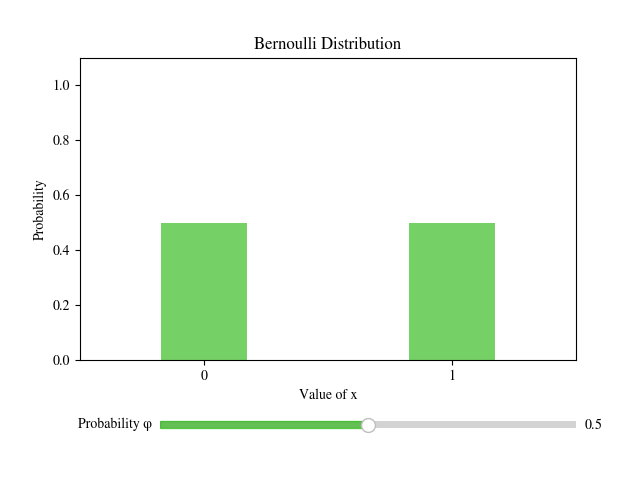

In [21]:
def bernoulli(phi):
    return [phi, 1-phi]

# Define values that x can take 
x_values = ['0', '1']

# Define initial phi 
init_phi = 0.5

# Compute probabilities
probs = bernoulli(init_phi)

fig, ax = plt.subplots()

bar_container = ax.bar(x_values, probs, width=0.35, color=(0.1, 0.7, 0.0, 0.6))

fig.subplots_adjust(bottom=0.25)
axprob = fig.add_axes([0.25, 0.1, 0.65, 0.03])
prob_slider = Slider(
    ax=axprob,
    label='Probability φ',
    valmin=0.0,
    valmax=1.0,
    valinit=init_phi,
    color=(0.1, 0.7, 0.0, 0.6)
)

# Change height of bars after moving the slider
def update(val):
    probs = bernoulli(val)
    for count, rect in zip([0,1], bar_container.patches):
        rect.set_height(probs[count])
    fig.canvas.draw_idle()


# Register the update function with the slider
prob_slider.on_changed(update)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Probability')
ax.set_xlabel('Value of x')
ax.set_title('Bernoulli Distribution')

plt.show()

## Threedimensional Gaussian Distribution

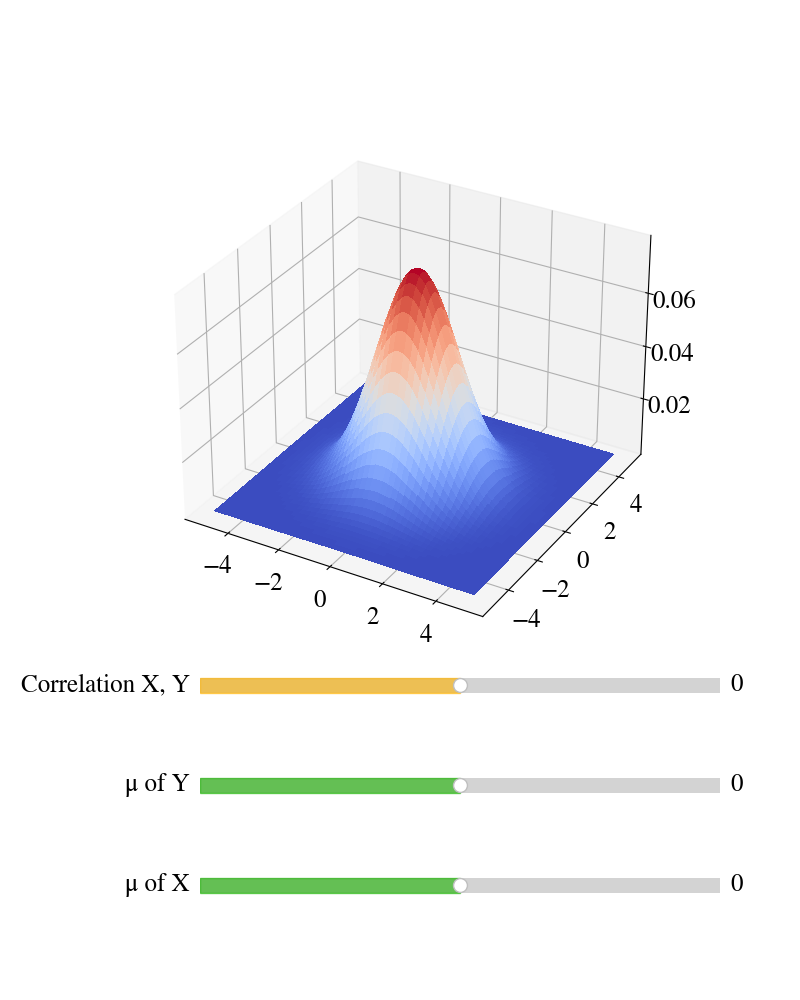

In [22]:
from scipy.stats import multivariate_normal 
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 10))
fig.subplots_adjust(bottom=0.35)

ax_x_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])
ax_y_slider = fig.add_axes([0.25, 0.2, 0.65, 0.03])
ax_corr_slider = fig.add_axes([0.25, 0.3, 0.65, 0.03])

x_mean, y_mean = 0, 0
variance_x, variance_y, correlation_xy = 2, 2, 0

x_slider = Slider(
    ax = ax_x_slider,
    label="μ of X",
    valmin=-5,
    valmax=5,
    valinit=x_mean,
    valstep = np.arange(-5, 5, 0.5),
    color=(0.1, 0.7, 0.0, 0.6))

y_slider = Slider(
    ax= ax_y_slider,
    label="μ of Y",
    valmin=-5,
    valmax=5,
    valinit= y_mean,
    valstep = np.arange(-5, 5, 0.5),
    color=(0.1, 0.7, 0.0, 0.6))

corr_slider = Slider(
    ax = ax_corr_slider,
    label= "Correlation X, Y",
    valmin=-1,
    valmax=1,
    valinit= 0,
    valstep = np.arange(-1, 1, 0.1),
    color=(1.0, 0.7, 0.0, 0.6))

# Change height of bars after moving the slider
def update_x_mean(val):
    ax.cla()
    global x_mean
    x_mean = val
    dist = update_normal_distribution()
    surf = ax.plot_surface(x, y, dist.pdf(pos), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)    
    fig.canvas.draw_idle()
    
def update_y_mean(val):
    ax.cla()
    global y_mean
    y_mean = val
    dist = update_normal_distribution()
    surf = ax.plot_surface(x, y, dist.pdf(pos), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)    
    fig.canvas.draw_idle()
    
def update_correlation(val):
    ax.cla()
    global correlation_xy
    correlation_xy = val
    dist = update_normal_distribution()
    surf = ax.plot_surface(x, y, dist.pdf(pos), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)    
    fig.canvas.draw_idle()
    
def update_normal_distribution():
    global x_mean, y_mean, variance_x, variance_y, correlation_xy, covariance
    covariance = correlation_xy*np.sqrt(variance_x)*np.sqrt(variance_y)
    rv = multivariate_normal(
        [x_mean, y_mean], 
        [[variance_x, covariance], [covariance, variance_y]], 
        allow_singular=True)
    return rv

# Register the update function with each slider
x_slider.on_changed(update_x_mean)
y_slider.on_changed(update_y_mean)
corr_slider.on_changed(update_correlation)



x, y = np.mgrid[-5:5:.005, -5:5:.005]
pos = np.dstack((x, y))
dist = update_normal_distribution()

surf = ax.plot_surface(x, y, dist.pdf(pos), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

## Exponential distribution

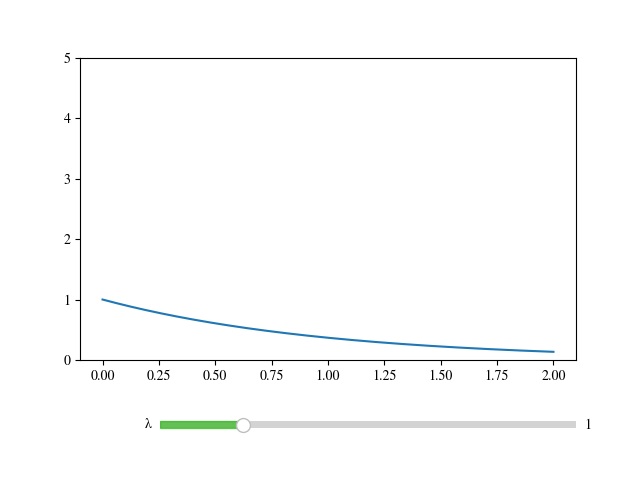

In [22]:
from scipy.stats import expon

x = np.linspace(0, 2, 1000)

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.25)



ax_slider = fig.add_axes([0.25, 0.1, 0.65, 0.03])

def update_lambda(val):
    ax.cla()
    ax.set_ylim(0,5)
    ax.plot(x, expon.pdf(x, scale = 1/val))
    fig.canvas.draw_idle()

slider_x = Slider(
    ax = ax_slider,
    label="λ",
    valmin=0,
    valmax=5,
    valinit=1,
    color=(0.1, 0.7, 0.0, 0.6))

slider_x.on_changed(update_lambda)

ax.set_ylim(0,5)
ax.plot(x, expon.pdf(x, scale=1))
plt.show()


## Laplace distribution

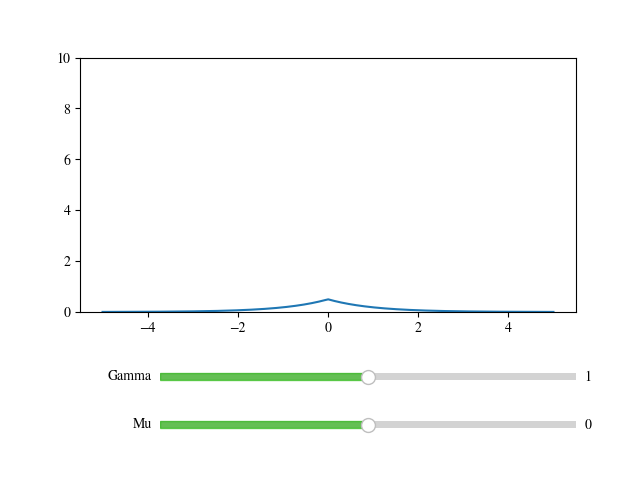

In [23]:
from numpy import exp
from scipy.stats import expon

x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.35)

mu_init = 0
gamma_init = 1

ax_mu = fig.add_axes([0.25, 0.1, 0.65, 0.03])
ax_gamma = fig.add_axes([0.25, 0.2, 0.65, 0.03])


def update(val):
    ax.cla()
    mu = mu_slider.val
    gamma = gamma_slider.val
    ax.set_ylim(0,10)
    ax.plot(x, (1/(2*gamma)*exp(-(abs(x-mu))/gamma)))
    fig.canvas.draw_idle()

mu_slider = Slider(
    ax = ax_mu,
    label="Mu",
    valmin=-5,
    valmax=5,
    valinit=mu_init,
    color=(0.1, 0.7, 0.0, 0.6))

gamma_slider = Slider(
    ax = ax_gamma,
    label="Gamma",
    valmin=0,
    valmax=2,
    valinit=gamma_init,
    color=(0.1, 0.7, 0.0, 0.6))

mu_slider.on_changed(update)
gamma_slider.on_changed(update)

ax.set_ylim(0,10)
ax.plot(x, (1/(2*gamma_init)*exp(-(abs(x-mu_init))/gamma_init)))
plt.show()


## Dirac distribution